## Dataset 1 : AirBnB Open Data from Seattle
###### Problem to solve is Regression
********

## Converting all 3 csv files to dataframes

In [95]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, ImageColorGenerator

nltk.download('vader_lexicon')
sb.set()
pd.set_option('display.max_columns', 500)   
# pd.set_option('display.max_rows', 500)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaikiat/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [96]:
calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [97]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [98]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [99]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


# Cleaning up data 
* Removing all dollar signs
* Converting date to date time 
* Tabulating the number of nulls in the dataset



In [100]:
# Calendar df
calendar.price = calendar.price.replace('[\$,]', '', regex=True).astype(float)
calendar.date = pd.to_datetime(calendar.date)

# Listings df
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
listings.weekly_price = listings.weekly_price.replace('[\$,]', '', regex=True).astype(float)
listings.monthly_price = listings.monthly_price.replace('[\$,]', '', regex=True).astype(float)
listings.extra_people = listings.extra_people.replace('[\$,]', '', regex=True).astype(float)
listings.cleaning_fee = listings.cleaning_fee.replace('[\$,]', '', regex=True).astype(float)
listings.security_deposit = listings.security_deposit.replace('[\$,]', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.astype(str).str.replace('%','').astype(float)
listings.host_response_rate = listings.host_response_rate.astype(str).str.replace('%','').astype(float)
listings.host_since = pd.to_datetime(listings.host_since)

# reviews df
reviews.date = pd.to_datetime(reviews.date)


In [101]:
# count the number of Null in each column for listing dataframe
listings.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
license,3818
square_feet,3721
monthly_price,2301
security_deposit,1952
weekly_price,1809
notes,1606
neighborhood_overview,1032
cleaning_fee,1030
transit,934
host_about,859


In [102]:
# count the number of Null in each column for reviews dataframe
reviews.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
comments,18


In [103]:
# count the number of Null in each column for calendar dataframe
calendar.isnull().sum().to_frame(name='counts').query('counts > 0').sort_values(by=['counts'],ascending=False)

,counts
price,459028


# Basic Data Visualisation / Data Analysis
1. Using GeoPandas to visualise the location of the Airbnb around Seattle
2. Bar Graph to show number of airbnb per neighbourhood & avg price per neighbourhood
3. Graph to show how price / number of bookings fluctuate throughout the year
4. Graph to show how price differ for different property type / apartment type
5. Visualisation of the number of ammenities that a listing can have 
6. Sentiment analysis of airbnb reviews
7. Graph of number of listings from 2008 - 2015
-------------------

# 1. Using GeoPandas to visualise the location of the Airbnb around Seattle
Can comment this out because it is extremely slow

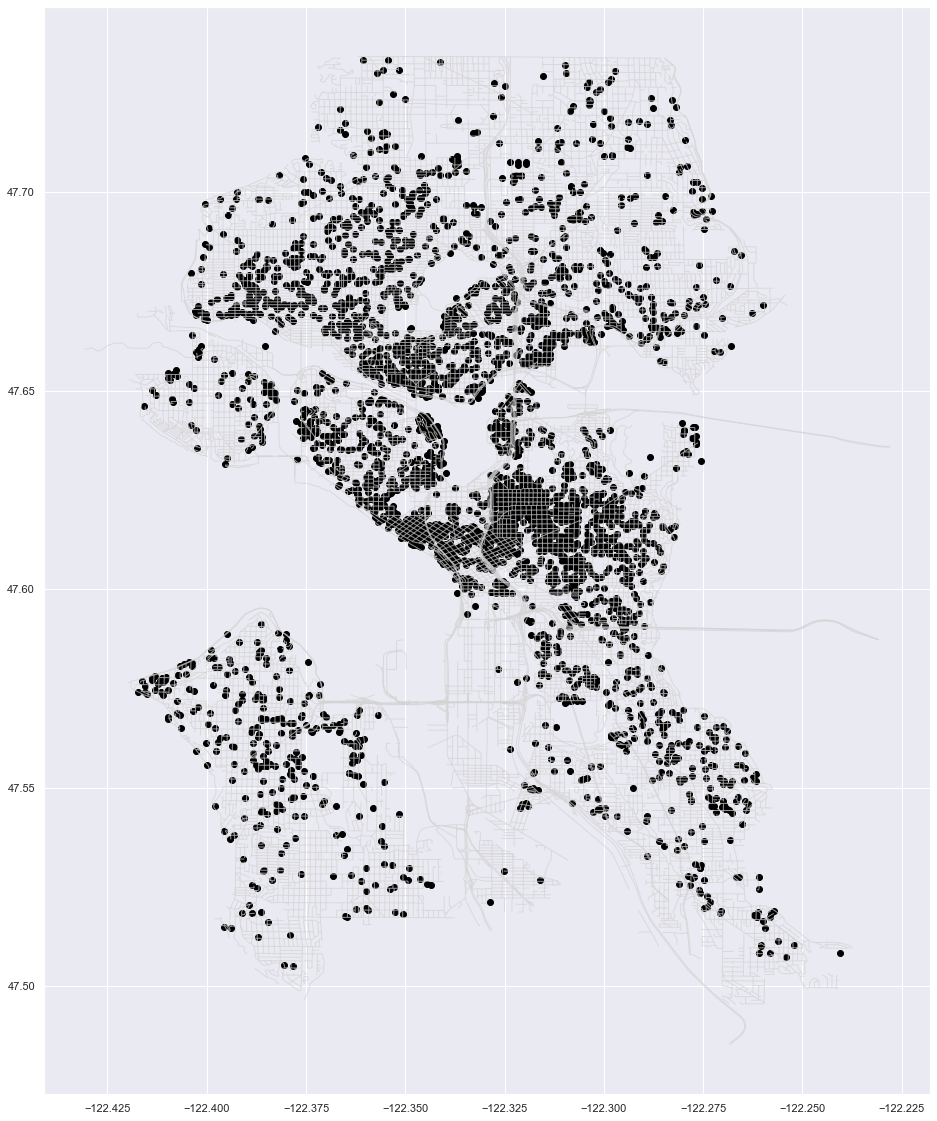

In [104]:
# create a geo panda dataframe  
listings_duplicate = listings.copy()
# change combined _listings to listings_duplicate 
gdf = gpd.GeoDataFrame(listings_duplicate,geometry=gpd.points_from_xy(listings_duplicate['longitude'],listings_duplicate['latitude']))
# reading seattle's street/map data
df_seattle = gpd.read_file('https://opendata.arcgis.com/datasets/383027d103f042499693da22d72d10e3_0.geojson')

fig,ax = plt.subplots(figsize=(30,20))    
# plotting seattle's street/map
df_seattle.plot(color='lightgrey',linewidth=1,alpha=0.7,ax=ax)
# plotting the location of the airbnbs
gdf.plot(color='black',ax=ax)

Most of the airbnbs are clustered in the middle of Seattle

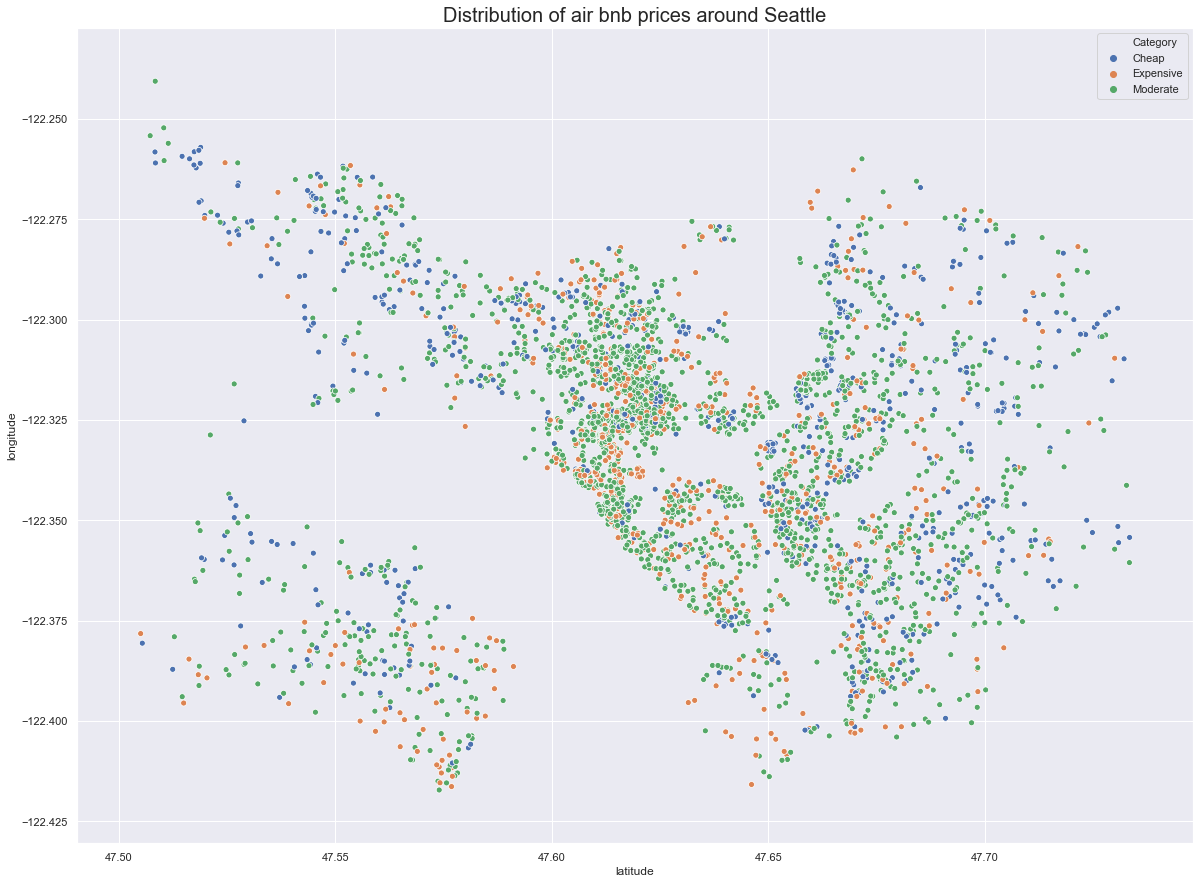

In [105]:
quartile_80 = listings_duplicate['price'].quantile(0.8)
quartile_20 = listings_duplicate['price'].quantile(0.2)

listings_duplicate.loc[listings_duplicate['price'] > quartile_80 , 'Category' ] = 'Expensive' 
listings_duplicate.loc[listings_duplicate['price'] < quartile_20 , 'Category' ] = 'Cheap' 
listings_duplicate.loc[(listings_duplicate['price'] > quartile_20 ) & (listings_duplicate['price'] < quartile_80), 'Category' ] = 'Moderate' 
listings_duplicate['Category'] = listings_duplicate['Category'].astype('category')


fig,ax = plt.subplots(figsize=(20,15))
plt.title('Distribution of air bnb prices around Seattle', fontsize=20)
sb.scatterplot(x="latitude", y="longitude", hue="Category",data=listings_duplicate)

# 2. Number of AirBnb per neighbourhood

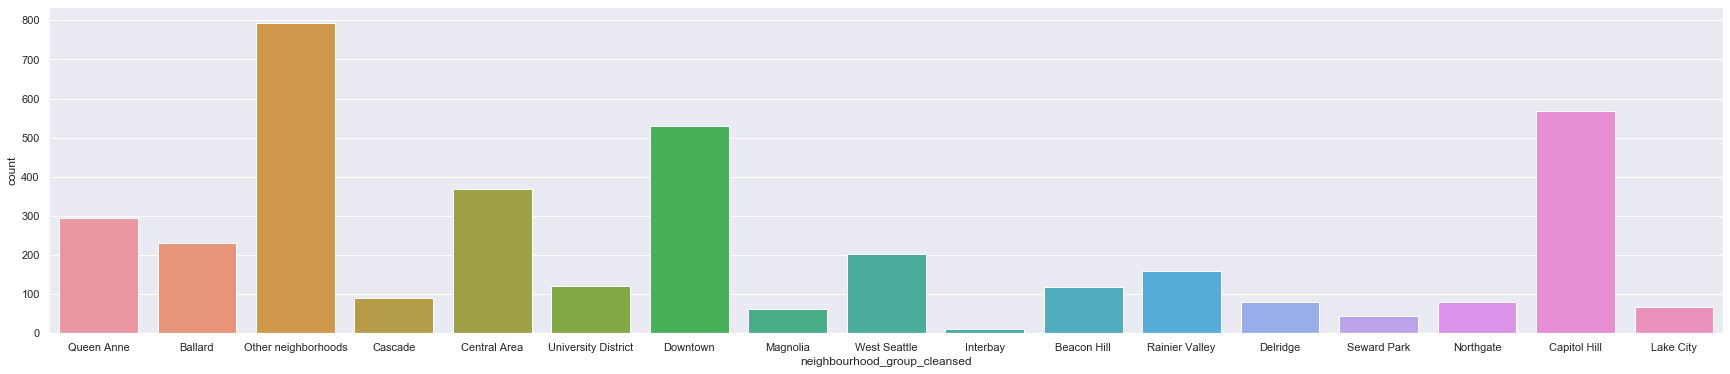

In [106]:
plt.figure(figsize=(30, 6))
sb.countplot(listings["neighbourhood_group_cleansed"])

# 3. Average Price per neighbourhood

In [107]:
listings.neighbourhood_group_cleansed=listings.neighbourhood_group_cleansed.astype('category')


# Plot the price distribution for different neighbourhoods
listings_filtered = pd.DataFrame(listings[["price", "neighbourhood_group_cleansed"]])
price_distribution=pd.pivot_table(listings_filtered,
                                  values = ['price'],
                                  index=['neighbourhood_group_cleansed'] ,
                                  aggfunc = {'price':np.mean})
# count distribution
count_distribution=listings_filtered.groupby('neighbourhood_group_cleansed').count().rename(columns = {'price':'Number of Listings'})

# merge both dataframe together
count_distribution.reset_index()
price_distribution.reset_index()
combined_dist=count_distribution.merge(price_distribution,left_on='neighbourhood_group_cleansed',right_on='neighbourhood_group_cleansed')
combined_dist.rename(columns ={'price':'Average Price/day'}).sort_values(by=['Average Price/day'],ascending=False)

,Number of Listings,Average Price/day
neighbourhood_group_cleansed,,
Magnolia,61,177.672131
Queen Anne,295,157.223729
Downtown,530,154.405660
West Seattle,203,141.359606
Cascade,89,140.101124
Capitol Hill,567,130.592593
Central Area,369,128.338753
Ballard,230,124.682609
Other neighborhoods,794,119.968514


# 4. Graph to show how  price & booking fluctuate throughout the year
1)Graph for **average price** against **time**

2)Graph for **number of bookings** against **time**

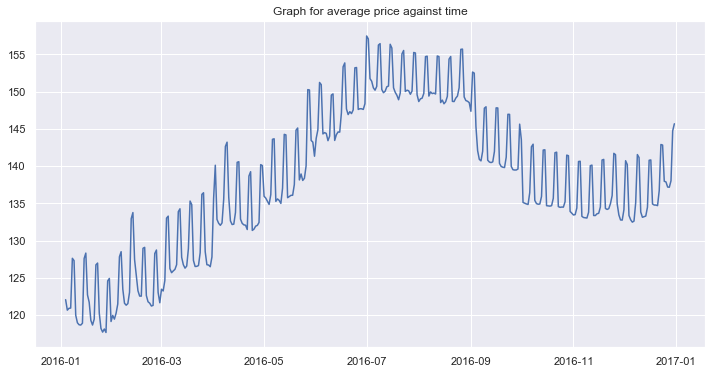

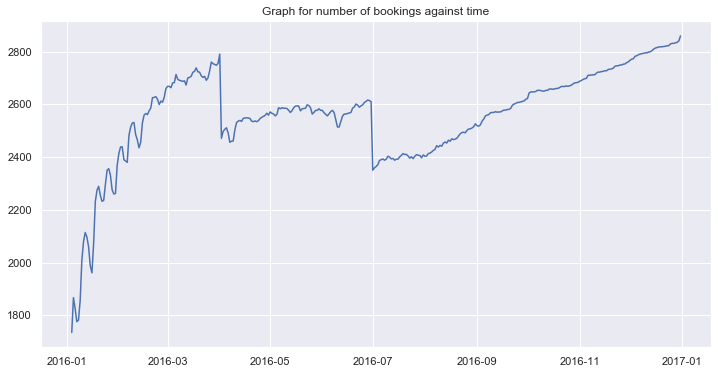

In [108]:
# from pandas.tseries import converter
# converter.register()

# Graph for average price against time
calendar_filtered1 = calendar.dropna()
# only consider 2016 data
calendar_filtered1=calendar_filtered1[calendar_filtered1['date'].dt.year==int(2016)]
calendar_filtered1=calendar_filtered1.drop('listing_id',axis=1).groupby(['date']).mean()
calendar_filtered1.reset_index(inplace=True)
# calendar_filtered1['date'] = pd.to_datetime(calendar_filtered1['date'])

plt.figure(figsize=(12,6))
plt.title('Graph for average price against time')
plt.plot(calendar_filtered1['date'], calendar_filtered1['price'])


# Graph for number of bookings against time
# assumption remove available = f from calculation
calendar_filtered2 = calendar.dropna()
# only consider 2016 data
calendar_filtered2=calendar_filtered2[calendar_filtered2['date'].dt.year==int(2016)]
calendar_filtered2=calendar_filtered2.groupby(['date']).size().reset_index(name='counts')
calendar_filtered2['date'] = pd.to_datetime(calendar_filtered2['date'])


plt.figure(figsize=(12,6))
plt.title('Graph for number of bookings against time')
plt.plot(calendar_filtered2['date'], calendar_filtered2['counts'])



The number of booking peaks towards the end of the year as well as during April, to maximise profits the host should raise prices during this 2 period

# 4. Graph to show how price differ for different property / apartment type

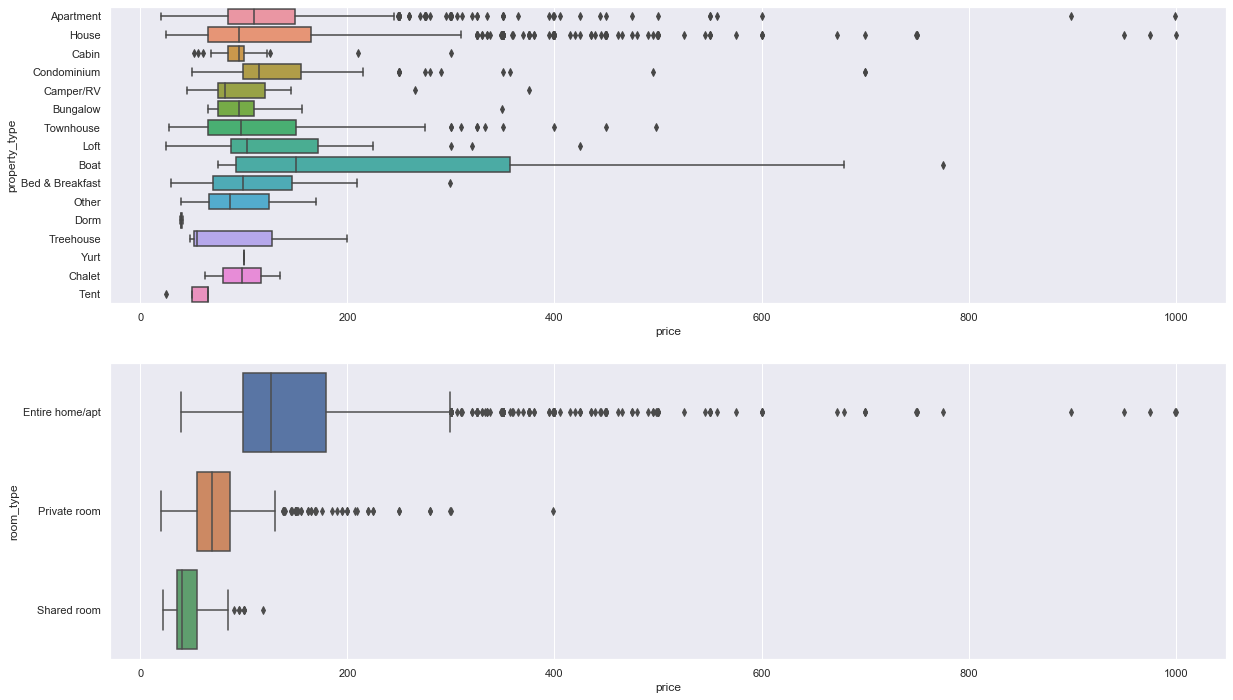

In [109]:
f, axes = plt.subplots(2, 1, figsize=(20,12))
sb.boxplot(x = listings.price , y = listings.property_type , data = listings , orient = "h" , ax = axes[0])
sb.boxplot(x = listings.price , y = listings.room_type , data = listings , orient = "h" , ax=axes[1])

* Property Type = Apartment & House have the most outliers
* Room Type = Entire Room has the most outliers and are generally more expensive

# 5 . Visualisation of the number of ammenities that a listing can have

In [110]:
listings['no_of_amenites']= listings.apply(lambda row : len(row.amenities.split(',')) ,axis=1)
listings[['amenities','no_of_amenites']].head()

,amenities,no_of_amenites
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",16
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",21
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",14
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",13


Text(0, 0.5, 'Count')

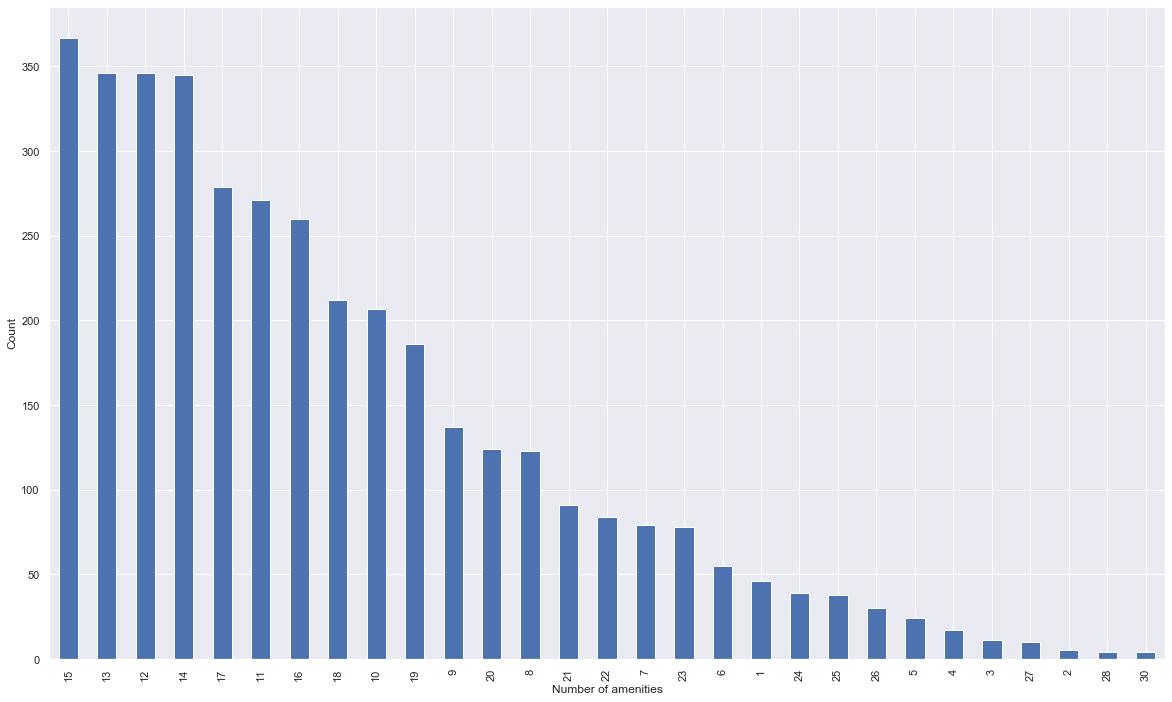

In [132]:
plt.figure(figsize=(20,12))
listings['no_of_amenites'].value_counts().plot(kind = 'bar')
plt.xlabel('Number of amenities')
plt.ylabel('Count')

# 6. Sentiment analysis of airbnb reviews

In [112]:
df_comments = reviews[['listing_id', 'comments','id']].copy().rename(columns = {'id':'comment_id'})
df_neighbourhood = listings[['id','neighbourhood_cleansed']]


def getNeighborhood(listing_id):
    neighbourhood = listings.loc[listings['id'] == listing_id, 'neighbourhood_cleansed'].iloc[0]
    return neighbourhood

df_comments.dropna(inplace = True)  #drop all empty rows
df_comments['neighbourhood'] = df_comments['listing_id'].apply(getNeighborhood)
df_comments

,listing_id,comments,comment_id,neighbourhood
0,7202016,Cute and cozy place. Perfect location to every...,38917982,Lower Queen Anne
1,7202016,Kelly has a great room in a very central locat...,39087409,Lower Queen Anne
2,7202016,"Very spacious apartment, and in a great neighb...",39820030,Lower Queen Anne
3,7202016,Close to Seattle Center and all it has to offe...,40813543,Lower Queen Anne
4,7202016,Kelly was a great host and very accommodating ...,41986501,Lower Queen Anne
...,...,...,...,...
84844,3624990,The description and pictures of the apartment ...,50436321,First Hill
84845,3624990,We had an excellent stay. It was clean and com...,51024875,First Hill
84846,3624990,"Gran ubicación, cerca de todo lo atractivo del...",51511988,First Hill
84847,3624990,"Very good apartement, clean and well sized. Si...",52814482,First Hill


In [113]:
def sentiment_analyzer_scores(comment):
    sentence = str(comment)
    score = analyser.polarity_scores(comment)
    return score['compound']

analyser = SentimentIntensityAnalyzer()
df_comments['polarity'] = df_comments['comments'].apply(sentiment_analyzer_scores)
df_comments.sort_values(by=['polarity'],ascending=True,inplace = True)

df_comments.sample(10)

,listing_id,comments,comment_id,neighbourhood,polarity
74856,5660792,Caroline was an awesome Airbnb host. Super fri...,36218286,Broadway,0.9480
43756,762029,"Greetings airbnb community,\r\nIf you're looki...",4678513,West Queen Anne,0.9882
31810,5229971,"We loved the location on Puget Sound, very clo...",48909439,Alki,0.9570
44709,815017,Mia is so cool and welcoming! The room has an ...,12040182,North Beacon Hill,0.9586
58877,2620429,"I've stayed at a few Airbnb places now, but th...",23742791,First Hill,0.9826
64503,1023693,Shannon contacted me the night before to confi...,18790858,Whittier Heights,0.9682
42251,5680462,The house is very spacious and comfortable. \n...,44568297,West Queen Anne,0.9379
61933,6886633,"Shawn was an amazing host, totally friendly an...",46279787,West Woodland,0.9827
35628,535300,"This spot in Eastlake is tiny, but if you don'...",4151809,Eastlake,0.8621
11575,1080097,The place was great. It's a huge studio/loft a...,14641039,Pioneer Square,0.9286


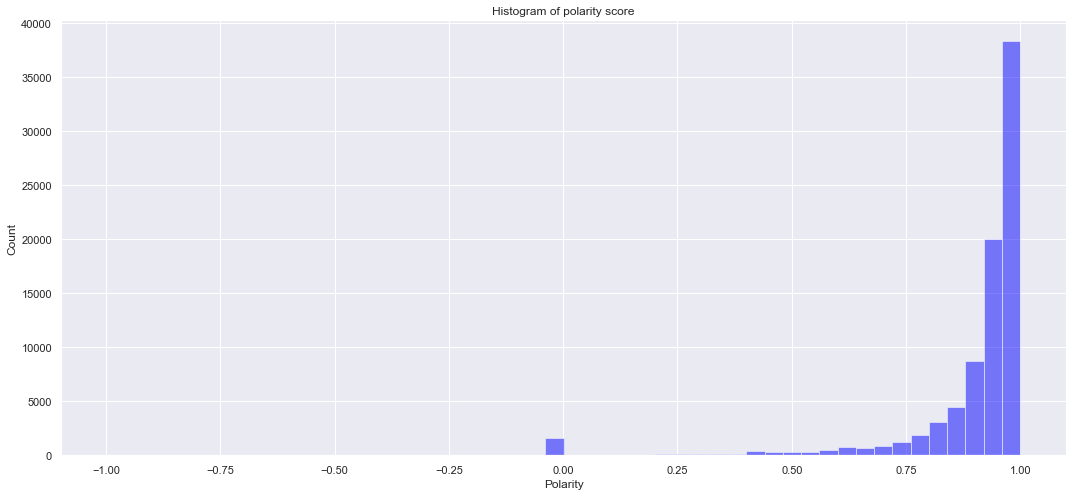

In [114]:
# A histogram of the polarity scores (to show the spread of polarity scores)
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(df_comments.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity score')
plt.show()

In [115]:
print('The mean polarity score is = ' + str(df_comments.polarity.describe().iloc[1]))
print('The median polarity score is = ' + str(df_comments.polarity.describe().iloc[5]))

The mean polarity score is = 0.8849848817059801
The median polarity score is = 0.9541


Most reviews have a positive score , with a significant number close to 1.

In [116]:
polarity_per_listing_id=df_comments.groupby('listing_id',as_index=False)['polarity'].mean()
polarity_per_listing_id.sort_values(by=['polarity'],ascending=True,inplace = True)
polarity_per_listing_id.sample(5)

,listing_id,polarity
1761,5956968,0.948647
990,3434459,0.911480
3116,9411935,0.899750
2685,8033438,0.754972
833,2868006,0.822538


In [117]:
print('Positive scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] > 0].count())
print('Negative scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] < 0].count())
print('Neutral scores: ',polarity_per_listing_id['polarity'][polarity_per_listing_id['polarity'] == 0].count())

Positive scores:  3165
Negative scores:  5
Neutral scores:  21


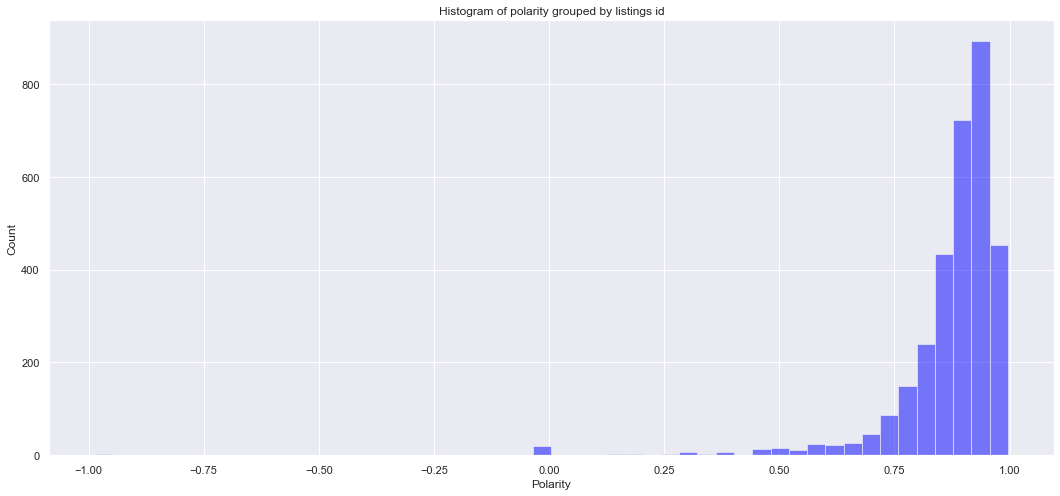

In [118]:
# A histogram of the polarity scores grouped by listing_id
num_bins = 50
plt.figure(figsize=(18,8))
n, bins, patches = plt.hist(polarity_per_listing_id.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity grouped by listings id')
plt.show();

In [119]:
print('The mean polarity score is = ' + str(polarity_per_listing_id.polarity.describe().iloc[1]))
print('The median polarity score is = ' + str(polarity_per_listing_id.polarity.describe().iloc[5]))

The mean polarity score is = 0.8701993312493533
The median polarity score is = 0.9046691176470587


When the polarity scores are grouped by listing_id there is a slight left shift in the graph , this implies that there are once in a while there are negative reviews to pull the average polarity score for eact listing_id.

In [120]:
from langdetect import detect

# to improve the speed of the code
# we will scale down the dataframe
df_comments_sample = df_comments.sample(3000)

for index, row in df_comments_sample['comments'].iteritems():
    try:
        lang = detect(row) # detecting each row
        df_comments_sample.loc[index, 'language_used'] = lang
    except:
        df_comments_sample.loc[index, 'language_used'] = 'Error'
        
df_comments_sample.language_used.unique()

array(['en', 'nl', 'fr', 'zh-cn', 'de', 'ko', 'es', 'tr', 'ru', 'Error'],
      dtype=object)

In [121]:
df_comments_sample_by_language_count = df_comments_sample.groupby(['language_used']).size().reset_index(name = 'count')
df_comments_sample_by_language_count.sort_values(by = 'count' , ascending = False)

,language_used,count
2,en,2963
4,fr,12
5,ko,8
1,de,5
9,zh-cn,5
3,es,3
0,Error,1
6,nl,1
7,ru,1
8,tr,1


Most reviews are writen in English , there is also a small portion of reviews writen in laguages such as French and Spanish. 

In [122]:
df_comments_sample_average_polarity = pd.DataFrame(df_comments_sample.groupby(['language_used'])['polarity'].mean())
df_comments_sample_average_polarity.sort_values(by = 'polarity' , ascending = False)

,polarity
language_used,
en,0.897523
fr,0.404292
tr,0.401900
es,0.113333
Error,0.000000
ko,0.000000
nl,0.000000
ru,0.000000
zh-cn,0.000000


Reviews writen in English tend to have a higher polarity score . Whereas , reviews writen in other laguages tend to have a lower polarity . Futhermore , some languages like zh-cn (Chinese) have a score of 0 .This could be due to certain limitations in the SentimentIntensityAnalyzer library 

<Figure size 720x432 with 0 Axes>

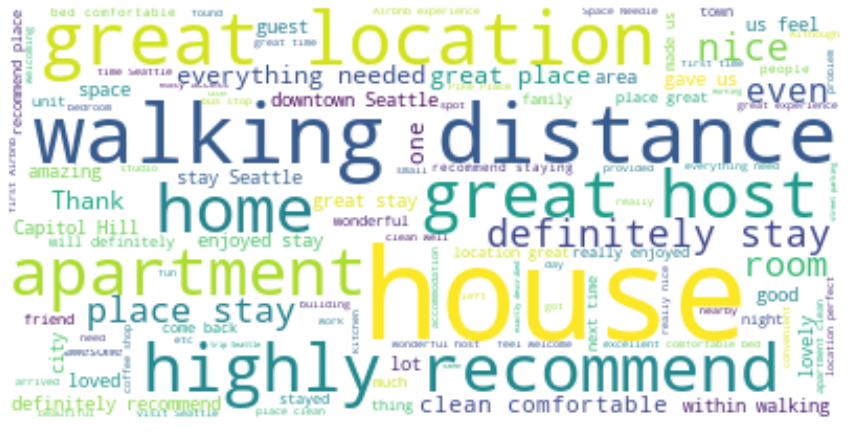

In [123]:
# Cutting the dataframe by half will make the function run faster
filtered_reviews = reviews.sample(40000)
concatenatedReviews = " ".join(str(row) for row in filtered_reviews['comments'])
# # Generate a word cloud image:
wordCloud = WordCloud(max_words=200, background_color="white").generate(concatenatedReviews)

plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))

plt.imshow(wordCloud, interpolation='Bilinear')
plt.axis("off")
plt.show()


# 7. Graph of number of listings from 2008 - 2015

In [124]:
listings_duplicate["host_since_year"] = listings_duplicate["host_since"].dt.year
listings_duplicate_filtered = listings_duplicate[['host_since','host_since_year']]
listings_duplicate_filtered = listings_duplicate_filtered.groupby(['host_since_year']).size().reset_index(name = 'count')
listings_duplicate_filtered["cummulative_sum"] = listings_duplicate_filtered['count'].cumsum()
listings_duplicate_filtered

,host_since_year,count,cummulative_sum
0,2008.0,4,4
1,2009.0,64,68
2,2010.0,149,217
3,2011.0,398,615
4,2012.0,539,1154
5,2013.0,776,1930
6,2014.0,900,2830
7,2015.0,981,3811
8,2016.0,5,3816


Text(0, 0.5, 'Number')

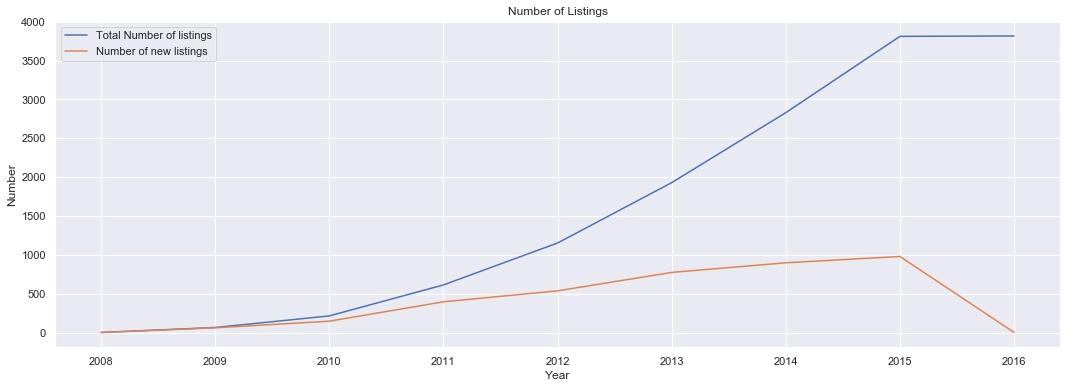

In [125]:
plt.figure(figsize=(18, 6))
plt.title('Number of Listings')
sb.lineplot(x="host_since_year", y="cummulative_sum", data=listings_duplicate_filtered, label="Total Number of listings")
sb.lineplot(x="host_since_year", y="count", data=listings_duplicate_filtered , label="Number of new listings")
plt.xlabel("Year")
plt.ylabel("Number")

The rate of increate of new listing increases from 2008 to 2015 but declines at 2016.

# Linear Regression

In [126]:
# Right join btw 2 dataframes (on 'id')
# listings & polarity_per_listing_id
combined_listings = (polarity_per_listing_id.merge(listings,left_on='listing_id',right_on='id',how='right')).drop('listing_id',axis=1)
combined_listings.shape

(3818, 94)

In [127]:
combined_listings.head()

,polarity,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,no_of_amenites
0,-0.9863,9183838,https://www.airbnb.com/rooms/9183838,20160104002432,2016-01-04,Belltown / Downtown Apartment,This 700 square foot apartment is close to res...,"The Space This is a 700 square foot, one bedro...",This 700 square foot apartment is close to res...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/cafb6889-5...,https://a2.muscache.com/im/pictures/cafb6889-5...,https://a2.muscache.com/ac/pictures/cafb6889-5...,https://a2.muscache.com/ac/pictures/cafb6889-5...,46005243,https://www.airbnb.com/users/show/46005243,Sam,2015-10-07,US,NaN,within an hour,100.0,100.0,f,https://a2.muscache.com/ac/pictures/18c3bc0f-c...,https://a2.muscache.com/ac/pictures/18c3bc0f-c...,Stevens,2.0,2.0,"['email', 'linkedin', 'reviews', 'jumio']",t,f,"Bell Street, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.614205,-122.343989,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",NaN,130.0,900.0,4000.0,200.0,61.0,2,50.0,1,20,3 days ago,t,30,57,57,57,2016-01-04,1,2015-12-06,2015-12-06,20.0,2.0,4.0,2.0,2.0,6.0,2.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.00,10
1,-0.9783,8474294,https://www.airbnb.com/rooms/8474294,20160104002432,2016-01-04,Cozy 2Br/2Bt Apt close to park,"Our cozy two bedroom/ two bathroom apartment, ...",Please feel free to look at our other listings...,"Our cozy two bedroom/ two bathroom apartment, ...",none,The Neighborhood Start the day off right with ...,NaN,Bus stops are nearby to take you where you nee...,https://a2.muscache.com/ac/pictures/4a0a7072-2...,https://a2.muscache.com/im/pictures/4a0a7072-2...,https://a2.muscache.com/ac/pictures/4a0a7072-2...,https://a2.muscache.com/ac/pictures/4a0a7072-2...,9813203,https://www.airbnb.com/users/show/9813203,Margaret,2013-11-04,"Seattle, Washington, United States",NaN,within an hour,100.0,100.0,f,https://a0.muscache.com/ac/users/9813203/profi...,https://a0.muscache.com/ac/users/9813203/profi...,Mount Baker,2.0,2.0,"['email', 'reviews']",t,f,"31st Avenue South, Seattle, WA 98144, United S...",Mount Baker,Mount Baker,Rainier Valley,Seattle,WA,98144,Seattle,"Seattle, WA",US,United States,47.579529,-122.293866,t,House,Entire home/apt,4,2.0,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,81.0,NaN,NaN,300.0,90.0,4,50.0,2,15,3 days ago,t,8,8,8,8,2016-01-04,1,2015-10-18,2015-10-18,40.0,10.0,10.0,2.0,2.0,10.0,8.0,f,NaN,WASHINGTON,f,strict,f,f,2,0.38,9
2,-0.4497,1343805,https://www.airbnb.com/rooms/1343805,20160104002432,2016-01-04,Greenlake Summer Home,NaN,

### Price's correlation with other variable

In [128]:
filtered_listings = listings.select_dtypes(include =['float64','int64']) 
to_drop = ['id','scrape_id','host_id','latitude','longitude','license']
filtered_listings = filtered_listings.drop(to_drop,axis=1)
filtered_listings.corr()['price'].sort_values()

reviews_per_month                -0.218588
number_of_reviews                -0.124695
availability_90                  -0.058810
calculated_host_listings_count   -0.054092
availability_60                  -0.049336
review_scores_value              -0.041776
availability_30                  -0.037653
availability_365                 -0.015550
host_response_rate               -0.014071
maximum_nights                   -0.003336
host_acceptance_rate              0.005900
review_scores_checkin             0.007877
review_scores_communication       0.012990
minimum_nights                    0.017297
review_scores_accuracy            0.019026
review_scores_cleanliness         0.054357
review_scores_rating              0.055551
review_scores_location            0.075069
host_listings_count               0.093962
host_total_listings_count         0.093962
extra_people                      0.127961
no_of_amenites                    0.184176
security_deposit                  0.373195
guests_incl